In [79]:
import pandas as pd

# Read data

In [80]:
train = pd.read_csv('Data/titanic/train.csv')
test = pd.read_csv('Data/titanic/test.csv')

In [81]:
train.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.75,F38,Q


# concat train and test
왜 합쳐줘야 하나요?

In [82]:
train_drop_Survived = train.drop('Survived', axis=1)

In [83]:
train_drop_Survived['tag'] = 'train'
test['tag'] = 'test'

In [84]:
df = pd.concat([train_drop_Survived, test])

In [85]:
# Age, Fare에 null 값이 있네요. Age에는 빈 값들이 많고, Fare는 딱 하나 비어있어요.
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
tag               0
dtype: int64

### Fare가 null 인 것을 index로 찾아볼까요?

In [86]:
df.loc[df['Fare'].isnull(), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,test


### Q. 비어있는 Fare 데이터를 적당한 값을 채워넣어 주세요.

In [87]:
# Pclass 별 Fare 의 Median 값 구한다

df.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [88]:
# Pclass 가 3이므로 해당하는 Median 값을 넣어준다

df.loc[df['Fare'].isnull(), 'Fare'] = df.groupby('Pclass')['Fare'].median()[3]

In [89]:
# 값이 잘 들어갔는지 확인

df[df['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,tag
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,8.05,NaN,S,test


### Q. 비어있는 Age 데이터를 적당한 값으로 채워넣어 주세요.

방법 1. 전체 데이터의 평균, 중앙, 최빈 중에 하나로 채워넣어준다.

In [90]:
# Median 으로 넣어준다
df['Age_v1'] = df['Age']
df.loc[df['Age_v1'].isnull(), 'Age_v1'] = df['Age'].median()

df[df['Age'].isnull()]['Age_v1']

5      28.0
17     28.0
19     28.0
26     28.0
28     28.0
29     28.0
31     28.0
32     28.0
36     28.0
42     28.0
45     28.0
46     28.0
47     28.0
48     28.0
55     28.0
64     28.0
65     28.0
76     28.0
77     28.0
82     28.0
87     28.0
95     28.0
101    28.0
107    28.0
109    28.0
121    28.0
126    28.0
128    28.0
140    28.0
154    28.0
       ... 
268    28.0
271    28.0
273    28.0
274    28.0
282    28.0
286    28.0
288    28.0
289    28.0
290    28.0
292    28.0
297    28.0
301    28.0
304    28.0
312    28.0
332    28.0
339    28.0
342    28.0
344    28.0
357    28.0
358    28.0
365    28.0
366    28.0
380    28.0
382    28.0
384    28.0
408    28.0
410    28.0
413    28.0
416    28.0
417    28.0
Name: Age_v1, Length: 263, dtype: float64

방법 2-1. 다른 변수들을 1개를 활용해 그룹 별 평균, 중앙, 최빈값들로 넣어준다.   
예를 들어, Pclass별로 Age가 눈에 띄게 다른 것을 발견했다면 Pclass별 평균 또는 중앙값으로 null 값들을 대체해준다.

In [91]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

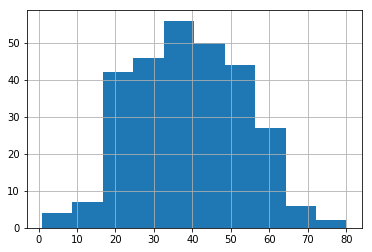

In [92]:
df[df['Pclass'] == 1]['Age'].hist()

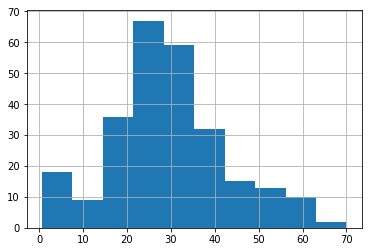

In [93]:
df[df['Pclass'] == 2]['Age'].hist()

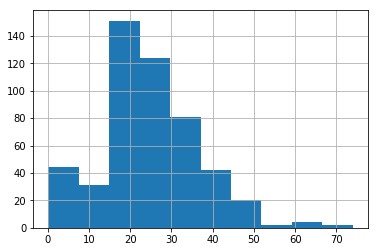

In [94]:
df[df['Pclass'] == 3]['Age'].hist()

In [95]:
df.groupby('Pclass')['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [96]:
# 혜민님 풀이
# groupby 의 transform method
df['Age_v2'] = df.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

df[df['Age'].isnull()][['Pclass', 'Age_v2']]

,Pclass,Age_v2
5,3,24.0
17,2,29.0
19,3,24.0
26,3,24.0
28,3,24.0
29,3,24.0
31,1,39.0
32,3,24.0
36,3,24.0
42,3,24.0


방법 2-2. 다른 변수들을 2개 이상을 활용해 그룹 별 평균, 중앙, 최빈값들로 넣어준다.
예를 들어 티켓의 클래스, 승선 항구 별로 Age가 다르다는 것을 발견했다면 Pclass, Embarked의 조합 그룹 별 평균 또는 중앙값으로 null 값들을 대체해준다.

In [98]:
df.groupby(['Pclass', 'Embarked'])['Age'].median()

Pclass  Embarked
1       C           39.0
        Q           37.0
        S           39.0
2       C           26.0
        Q           57.0
        S           29.0
3       C           20.5
        Q           24.0
        S           24.0
Name: Age, dtype: float64

In [101]:
len(df['Age'])
len(df['Age_v3'])

KeyError: 'Age_v3'

In [104]:
df['Age_v3'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

df[df['Age'].isnull()][['Pclass', 'Sex', 'Age_v3']]

,Pclass,Sex,Age_v3
5,3,male,25.0
17,2,male,29.5
19,3,female,22.0
26,3,male,25.0
28,3,female,22.0
29,3,male,25.0
31,1,female,36.0
32,3,female,22.0
36,3,male,25.0
42,3,male,25.0


방법 3. 회귀 분석으로 null 값들을 예측한다.

In [21]:
# Answer

### Q. Cabin, Embarked 컬럼의 경우에는 어떻게 해주면 좋을까요?

In [30]:
# Answer

### 사용할 컬럼들에 null 값이 없는지 최종적으로 확인하세요.

In [31]:
# Answer

# 작업물을 저장하세요.

In [34]:
# Answer